# **OVERALL BUSINESS PERFORMANCE PLOT: FROM FINANCIAL FIGURES**

## **1. QUICK CHECK ON DATA QUALITY**

In [10]:
# Load CSV (absolute path)
df_nulls = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\key_metrics_missing_values_check.csv"
)

df_nulls



,null_sales,null_cost,null_profit
0,0,0,0


- Insight: A data quality check on key financial metrics confirms that Sales, Cost and Gross Profit contain no missing values. This ensures the reliability of all subsequent profitability analyses and eliminates the need for imputation or data correction


In [11]:
import pandas as pd

# Load CSV with absolute path
df_loss_check = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\check_negative_gross_profit.csv"
)

# Display the dataframe
df_loss_check



,loss_rows
0,0


- Insight: A loss check confirms that there are no records with negative gross profit in the dataset. All transactions are profitable, indicating a consistently positive margin structure.

In [12]:
# Load CSV (absolute path)
df_rows = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\count_financial_figures_rows.csv"
)

df_rows


,total_rows
0,7957



  - The dataset contains 7,957 complete financial records, with no missing values in key metrics, ensuring high reliability for profitability analysis.


## **2. ANALYSIS: FINANCIAL BUSINESS STATISTIST**

### **2.1. Sales vs Cost vs Profit Insght**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV using absolute path (Windows-safe)
df = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\overall_profitability_kpis.csv"
)

df



,metric,amount
0,Sales,111471.06
1,Cost,38951.06
2,Gross Profit,72520.00


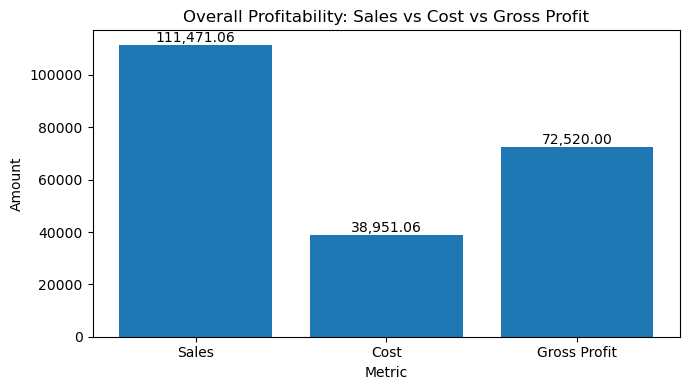

In [8]:
# Create bar chart: Sales vs Cost vs Gross Profit
plt.figure(figsize=(7, 4))

bars = plt.bar(
    df["metric"],
    df["amount"]
)

plt.title("Overall Profitability: Sales vs Cost vs Gross Profit")
plt.ylabel("Amount")
plt.xlabel("Metric")

# Format y-axis with plain numbers (no scientific notation)
plt.ticklabel_format(style='plain', axis='y')

# -----------------------------
# Add value labels on top of bars
# -----------------------------
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position (center of bar)
        height,                              # y position (top of bar)
        f"{height:,.2f}",                    # formatted value
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()





### **2.2. Margin Bands Insight**

In [16]:

df_margin = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\margin_group_profit_summary.csv"
)

df_margin




,margin_group,num_records,total_profit
0,<10%,96,92.75
1,>=40%,7861,72427.25


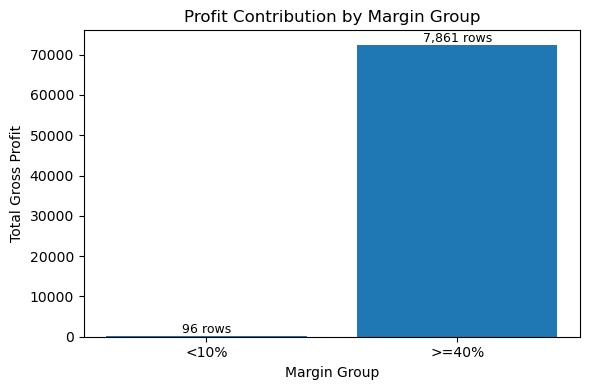

In [17]:
plt.figure(figsize=(6, 4))

bars = plt.bar(
    df_margin["margin_group"],
    df_margin["total_profit"]
)

plt.title("Profit Contribution by Margin Group")
plt.xlabel("Margin Group")
plt.ylabel("Total Gross Profit")
plt.ticklabel_format(style="plain", axis="y")

# 🔹 Add number of rows on top of each bar
for bar, rows in zip(bars, df_margin["num_records"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{rows:,} rows",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.savefig(
    "margin_group_profit_contribution.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()



  - **Insight Interpretation:** The business’s profitability is driven almost entirely by high-margin transactions (≥40 %). This highlights a strong dependency of the business on high-margin segments, which:
    - Is positive for overall profitability
    - But may also introduce risk if those products or segments are negatively impacted
  >
  -  - Although the ≥40% margin group generates almost all the profit, this is also because it concentrates the vast majority of transactions.
  >
  - Low-margin records (<10 %) contribute marginally and should be reviewed for strategic value or cost optimization.

##### **2.2.1. Strategic Implications & Recommendations (to scale profit): First Sight**

  1. **Double down on the ≥40% margin group (core profit engine):**
This group is the backbone of profitability and should be treated as a strategic growth lever:
>
 **Identify what drives these margins**
 - Products, regions, channels, customer segments, or pricing strategies behind ≥40% margins.
 >
 **Scale volume, not just margin**
 - Increase exposure through targeted marketing, sales incentives, or prioritization in the portfolio.
 >
 **Protect margin sustainability**
 - Monitor cost volatility, supplier dependency, and competitive pressure to avoid margin erosion.
 >
→ **Key action:** Treat ≥40% margin transactions as a “protected & scaled portfolio”, not just an outcome.

  2. **Analyze the mid-margin gap (missing 10–40%):**
  The absence (or very low presence) of mid-margin transactions suggests a structural gap:
  >
  This could indicate:
  >
  - Aggressive pricing strategy
  >
  - Binary cost structure (either very profitable or barely profitable)
  >
  - Missed opportunities for margin optimization

→ **Key actions:** 
  - Explore whether:
     - Some ≥40% products could scale down margin slightly to grow volume
     - Some <10% products could be repositioned into the 10–40% range via cost or pricing adjustments
  - Investigate whether the business can rebalance volume into sustainable mid-margin bands to reduce risk.


  3. **Reassess the <10% margin group (strategic vs. operational role):**
  Low-margin transactions contribute almost nothing to profit but still consume resources.
  >
  We recomend to analyse whether these records are:
  - Strategic (e.g. entry products, cross-selling, customer acquisition)
  - Or structural inefficiencies
  >
  If strategic, our recomendation is to define KPIs beyond profit (customer lifetime value, upsell potential)
  >
  If not strategic, prioritize:
  - Cost optimization
  - Pricing review
  - Or portfolio pruning
  >
→  **Key action:** Low-margin transactions should justify their existence beyond revenue.

  **Final Summary**
>
  - The business’s profitability is driven almost entirely by high-margin transactions (≥40%), which form the core profit engine.
  - While this is highly positive for overall profitability, it also creates dependency risk.
  - To scale profit sustainably, the business should:
     - Actively protect and scale high-margin segments
     - Investigate the absence of mid-margin transactions as a missed optimization opportunity
     - Reassess low-margin transactions for strategic relevance or cost efficiency


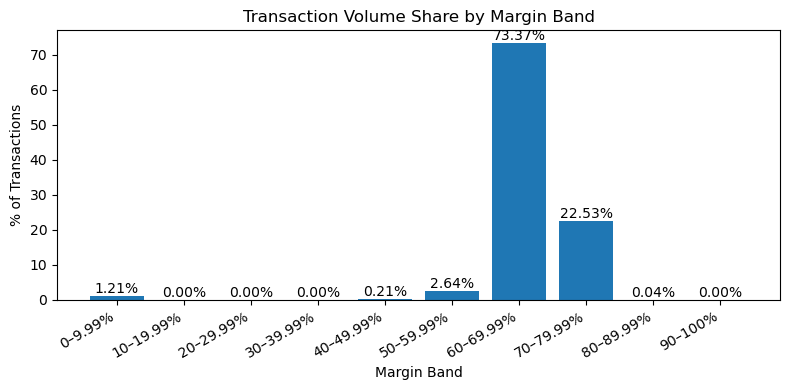

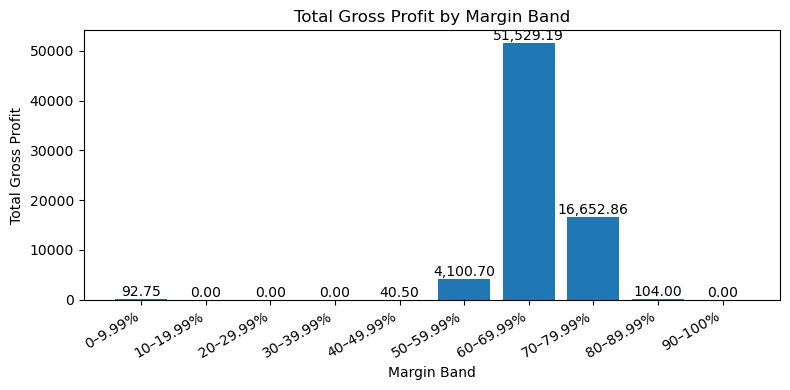

In [18]:
# ---------- 1) Load the CSV (Windows-safe absolute path) ----------
file_path = r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\overall_margin_volume.csv"
df = pd.read_csv(file_path)

# Optional: clean column names (sometimes CSV export adds spaces)
df.columns = [c.strip() for c in df.columns]

# Convert numeric columns (protects you if something came as text)
num_cols = ["num_records", "pct_transaction_volume", "total_profit", "avg_margin_pct"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- 2) Plot A: % Transaction Volume by Margin Band ----------
plt.figure(figsize=(8,4))
bars = plt.bar(df["margin_band"], df["pct_transaction_volume"])
plt.title("Transaction Volume Share by Margin Band")
plt.xlabel("Margin Band")
plt.ylabel("% of Transactions")
plt.xticks(rotation=30, ha="right")

# Add labels on bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{h:.2f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# ---------- 3) Plot B: Total Profit by Margin Band ----------
plt.figure(figsize=(8,4))
bars = plt.bar(df["margin_band"], df["total_profit"])
plt.title("Total Gross Profit by Margin Band")
plt.xlabel("Margin Band")
plt.ylabel("Total Gross Profit")
plt.xticks(rotation=30, ha="right")
plt.ticklabel_format(style="plain", axis="y")

# Add labels on bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{h:,.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


#### **2.2.2. Pareto (Top contributors + cumulative share)**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\wonka_sales_performance_operational_insights.csv"

df = pd.read_csv(file_path)

# Quick check
print(df.shape)
df.head()


(17, 11)


,entity_type,entity_name,entity_id,num_records,pct_transaction_volume,total_cost,total_sales,total_gross_profit,pct_profit_share,pct_sales_share,gross_margin_pct
0,Factory,Wicked Choccy's,Wicked Choccy's,4060,51.02,18855.86,54084.25,35228.39,48.58,48.52,65.14
1,Factory,Lot's O' Nuts,Lot's O' Nuts,3567,44.83,14814.40,47708.56,32894.16,45.36,42.80,68.95
2,Product,Wonka Bar - Triple Dazzle Caramel,WBTC,1989,25.00,9737.00,28087.50,18350.50,25.30,25.20,65.33
3,Product,Wonka Bar - Milk Chocolate,WBMC,2071,26.03,9118.86,25996.75,16877.89,23.27,23.32,64.92
4,Product,Wonka Bar - Nutty Crunch Surprise,WBNS,1789,22.48,6664.00,23257.36,16593.36,22.88,20.86,71.35


**Insight Pareto (Top contributors + cumulative share)**

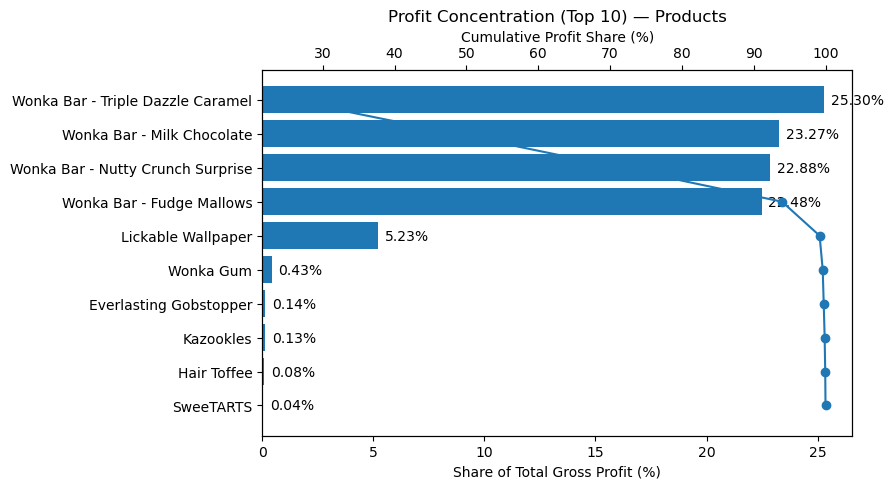

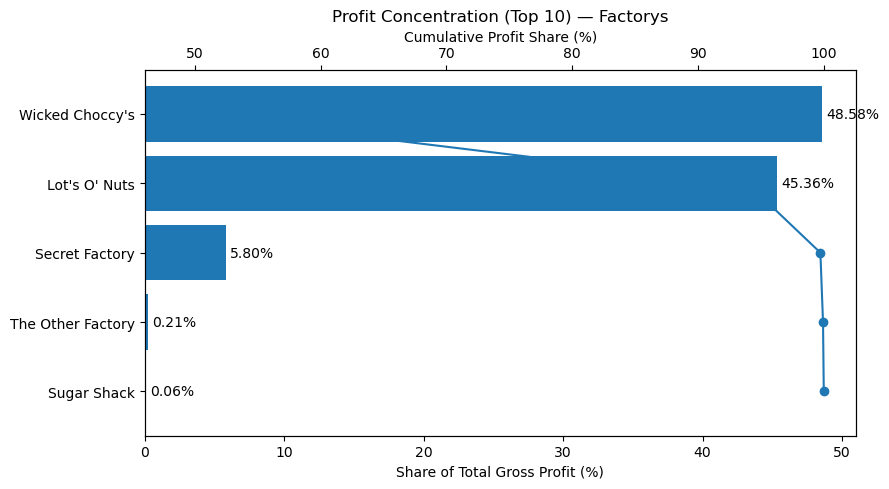

In [20]:
def pareto_profit_share(data, entity_type="Product", top_n=10):
    # Filter
    d = data[data["entity_type"] == entity_type].copy()

    # Ensure numeric columns
    for col in ["pct_profit_share", "pct_transaction_volume", "gross_margin_pct"]:
        if col in d.columns:
            d[col] = pd.to_numeric(d[col], errors="coerce")

    # Sort by profit share (descending)
    d = d.sort_values("pct_profit_share", ascending=False).head(top_n)

    # Cumulative profit share
    d["cum_profit_share"] = d["pct_profit_share"].cumsum()

    # Plot
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.barh(d["entity_name"], d["pct_profit_share"])
    ax.invert_yaxis()
    ax.set_xlabel("Share of Total Gross Profit (%)")
    ax.set_title(f"Profit Concentration (Top {top_n}) — {entity_type}s")

    # Cumulative line on a second axis
    ax2 = ax.twiny()
    ax2.plot(d["cum_profit_share"], d["entity_name"], marker="o")
    ax2.set_xlabel("Cumulative Profit Share (%)")

    # Label bars with exact values
    for i, v in enumerate(d["pct_profit_share"]):
        ax.text(v + 0.3, i, f"{v:.2f}%", va="center")

    plt.tight_layout()
    plt.show()

# Run for Products
pareto_profit_share(df, entity_type="Product", top_n=10)

# Run for Factories
pareto_profit_share(df, entity_type="Factory", top_n=10)


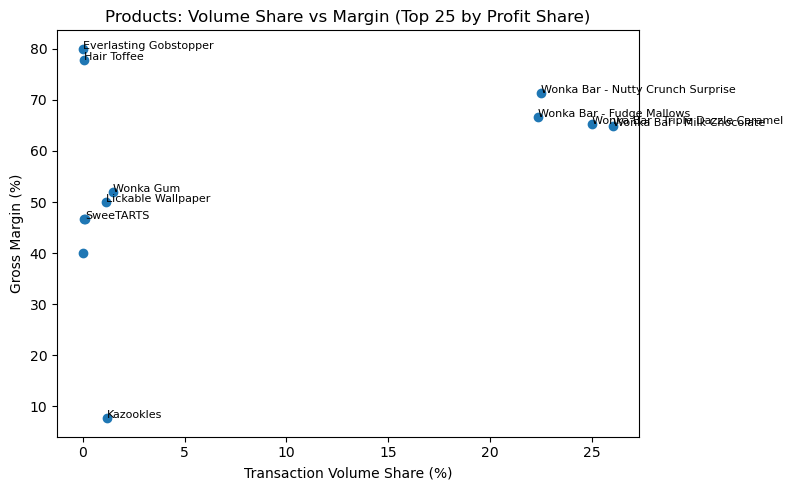

In [21]:
def volume_vs_margin(data, entity_type="Product", top_n=25):
    d = data[data["entity_type"] == entity_type].copy()

    for col in ["pct_transaction_volume", "gross_margin_pct", "pct_profit_share"]:
        d[col] = pd.to_numeric(d[col], errors="coerce")

    # Focus on top contributors by profit share
    d = d.sort_values("pct_profit_share", ascending=False).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.scatter(d["pct_transaction_volume"], d["gross_margin_pct"])

    # annotate a few key points (top 10)
    for _, r in d.head(10).iterrows():
        plt.text(r["pct_transaction_volume"], r["gross_margin_pct"], str(r["entity_name"]), fontsize=8)

    plt.title(f"{entity_type}s: Volume Share vs Margin (Top {top_n} by Profit Share)")
    plt.xlabel("Transaction Volume Share (%)")
    plt.ylabel("Gross Margin (%)")
    plt.tight_layout()
    plt.show()

# Example
volume_vs_margin(df, entity_type="Product", top_n=25)


In [23]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\pauli\OneDrive\Documentos\GitHub\Wonka-Sales-Performance-Operational-Insights\data\interim\wonka_sales_performance_operational_insights.csv"
)


In [24]:
df = pd.read_csv(
    r"data/interim/wonka_sales_performance_operational_insights.csv"
)


In [27]:
df.head()
df.columns


Index(['entity_type', 'entity_name', 'entity_id', 'num_records',
       'pct_transaction_volume', 'total_cost', 'total_sales',
       'total_gross_profit', 'pct_profit_share', 'pct_sales_share',
       'gross_margin_pct'],
      dtype='object')

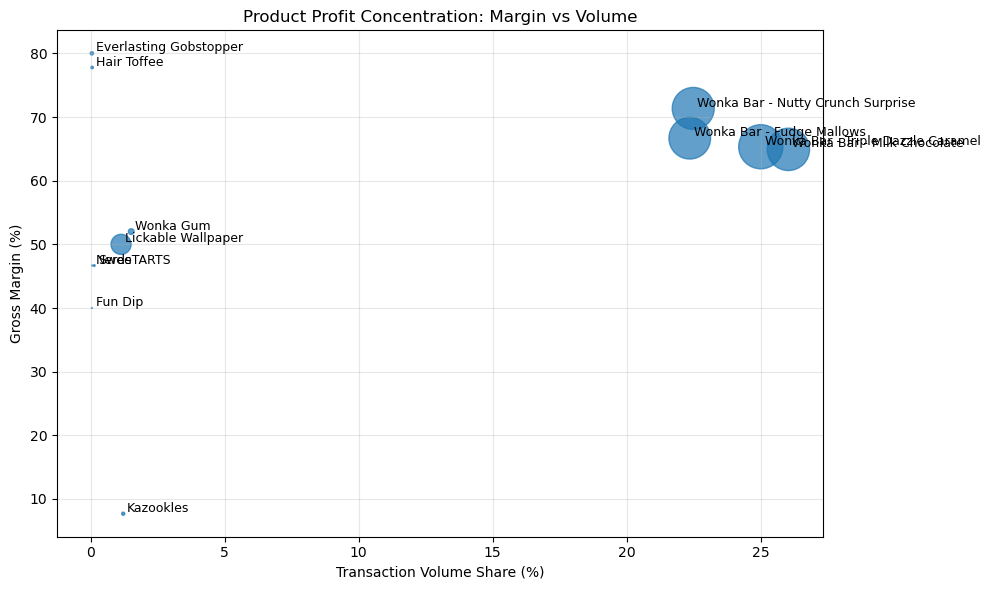

In [28]:
import matplotlib.pyplot as plt

# Filter products only
prod = df[df["entity_type"].str.lower() == "product"].copy()

# Keep top 15 by profit share (or 10 if you prefer)
prod = prod.sort_values("pct_profit_share", ascending=False).head(15)

plt.figure(figsize=(10, 6))

plt.scatter(
    prod["pct_transaction_volume"],
    prod["gross_margin_pct"],
    s=prod["pct_profit_share"] * 40,  # bubble size
    alpha=0.7
)

# Label only meaningful points
for _, row in prod.iterrows():
    plt.text(
        row["pct_transaction_volume"] + 0.15,
        row["gross_margin_pct"] + 0.3,
        row["entity_name"],
        fontsize=9
    )

plt.xlabel("Transaction Volume Share (%)")
plt.ylabel("Gross Margin (%)")
plt.title("Product Profit Concentration: Margin vs Volume")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


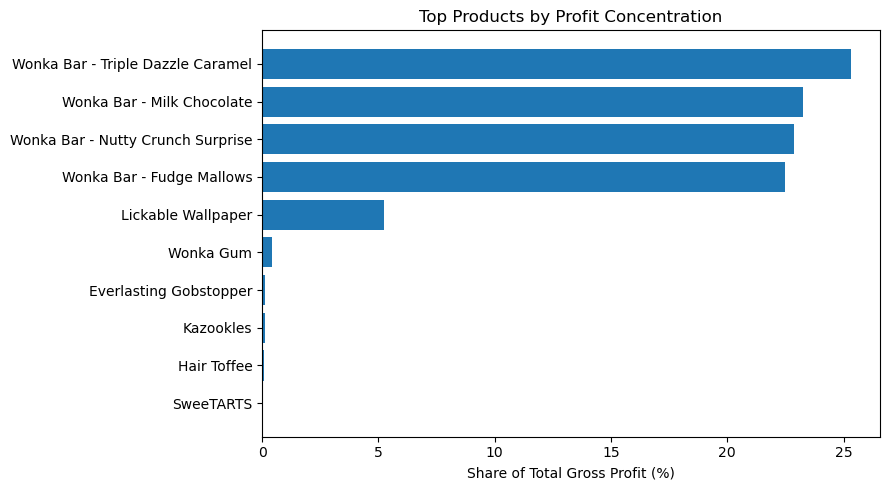

In [29]:
prod = df[df["entity_type"].str.lower() == "product"].copy()
prod = prod.sort_values("pct_profit_share", ascending=True).tail(10)

plt.figure(figsize=(9, 5))
plt.barh(prod["entity_name"], prod["pct_profit_share"])

plt.xlabel("Share of Total Gross Profit (%)")
plt.title("Top Products by Profit Concentration")

plt.tight_layout()
plt.show()
